#### Broad Topics for CLIP

##### What is CLIP?
- **Overview**: Purpose and significance in vision-language tasks.
- **Core Idea**: Contrastive learning between images and text.
- **Key Contributions**: Innovations introduced by CLIP.

##### What Data is Used?
- **Source**: Description of dataset types (e.g., internet-scale image-text pairs).
- **Scale**: Number of samples, diversity, and language coverage.
- **Data Preprocessing**: How the image-text pairs are prepared.
- **A Sample Data Pair Example**: A specific image-text pair from the dataset.

##### How is the Training Done?
- **Architecture**: Model structure for vision (e.g., ViT, ResNet) and text (e.g., Transformer).
- **Objective**: Contrastive loss—matching images with corresponding text.
- **Steps**: Training flow (e.g., feature extraction, loss computation).

##### How is Inference Done?
- **Workflow**: Steps to use CLIP for classification, retrieval, or other tasks.
- **Flexibility**: Few-shot and zero-shot capabilities.
- **Output**: How similarity scores or predictions are generated.

#### What is CLIP?

#### Overview

Imagine a model that can classify images of almost anything without needing specific training data. This is the promise of CLIP (Contrastive Language–Image Pretraining), a groundbreaking model developed by OpenAI that bridges the gap between visual and textual information.

CLIP (Contrastive Language–Image Pretraining) is a vision-language model introduced by OpenAI that bridges the gap between textual and visual information. Its primary purpose is to enable machines to understand and reason about images and text together, making it highly significant for tasks requiring multimodal understanding. It supports applications like zero-shot image classification, image-text retrieval, and multimodal learning.

CLIP is particularly transformative because it eliminates the need for task-specific labeled datasets by leveraging large-scale, internet-derived image-text pairs, making it a cornerstone for general-purpose AI in multimodal tasks.

At its heart, CLIP uses contrastive learning to associate images and their corresponding text. The model learns a shared embedding space where paired images and text are close to each other, while unpaired ones are far apart. This embedding space allows the model to generalize across diverse tasks without fine-tuning, enabling zero-shot and few-shot capabilities.

#### Predecessors of CLIP and How It Builds Upon Them

1. **Image Models**:
   - **ResNet**: A convolutional neural network (CNN) architecture designed for image classification. It introduced residual connections to solve the vanishing gradient problem, enabling the training of very deep networks.
   - **Vision Transformer (ViT)**: A model that applies the Transformer architecture, traditionally used in NLP, to image data. ViT segments images into patches and processes them as tokens, making it highly scalable for large datasets.

2. **Text Models**:
   - **Transformer**: A neural network architecture primarily used in NLP, which processes data using self-attention mechanisms. It forms the backbone of most modern NLP models.
   - **GPT**: A generative language model based on Transformers, designed for text understanding and generation tasks.

3. **Multimodal Models**:
   - **VisualBERT**: A model combining BERT-like architectures with visual information for multimodal reasoning tasks.
   - **VilBERT**: Builds on BERT to support tasks that require reasoning over text and images.
   - **ALIGN**: A model using contrastive learning for image-text alignment, closely related to CLIP.


#### Limitations of Previous Models

- **Task Specificity**: Earlier models like VisualBERT and VilBERT required task-specific fine-tuning, limiting their generalization capabilities.
- **Dataset Constraints**: Many multimodal models were trained on smaller, curated datasets that restricted their ability to generalize across domains.
- **Scalability Issues**: Traditional methods struggled with leveraging internet-scale datasets, especially noisy ones.
- **Zero/Few-Shot Learning Gaps**: Previous models lacked robust zero-shot and few-shot learning capabilities, requiring labeled data for each specific task.


#### Why CLIP is Better

1. **Contrastive Learning Framework**:
   - Unlike predecessors, CLIP learns a shared embedding space for images and text, aligning multimodal data more effectively without requiring task-specific labels.

2. **Internet-Scale Dataset**:
   - CLIP was trained on 400 million image-text pairs collected from the web, enabling it to generalize well to unseen tasks.

3. **Zero-Shot and Few-Shot Capabilities**:
   - Demonstrates strong performance on diverse tasks without any fine-tuning, making it significantly more versatile than prior models.

#### What Data is Used?

- **Source**: CLIP is trained on large-scale internet data, consisting of image-text pairs. These pairs are sourced from various domains, including websites, social media, and other online platforms where images and associated captions are publicly available.

- **Scale**: The dataset used for training CLIP contains hundreds of millions of image-text pairs. This large scale allows the model to generalize across diverse visual and textual domains. The diversity spans different types of content, such as art, objects, scenes, people, and more. Additionally, it covers multiple languages, though the primary language is English, with some multilingual capacity built into the model.

- **Data Preprocessing**: 
   - **Images**: Images are resized and standardized before being fed into the model. They are typically preprocessed to fit a consistent input size (e.g., 224x224 pixels) and normalized to a common range.
   - **Text**: Text descriptions (captions) are tokenized into words and then converted into embeddings using a transformer-based model. The captions are paired with their corresponding images to form training examples.
   - **Pairing**: Each image-text pair is processed to align the image with its textual description, allowing the model to learn the relationship between visual and semantic information.

- **A Sample Data Pair Example**: 
   - **Image**: A photo of a cat sitting on a windowsill.
   - **Text**: "A cat sitting on a windowsill looking outside."
   - This pair is used to teach the model how to match visual features (cat, windowsill) with textual features (sitting, looking outside).

-  The dataset used to train the CLIP model is not open-sourced. While OpenAI has released the CLIP model itself, the exact dataset used for training (which includes hundreds of millions of image-text pairs) has not been publicly shared. However, OpenAI provides a similar dataset, the LAION-400M dataset (https://laion.ai/blog/laion-400-open-dataset/), which is a large-scale collection of image-text pairs and is used for various vision-language models. This dataset can be accessed and used for research purposes, though it may not be identical to the one used to train CLIP.


Resolving data files:   0%|          | 0/128 [00:00<?, ?it/s]

Error downloading image: cannot identify image file <_io.BytesIO object at 0x34b482610>
Error downloading image: 404 Client Error: Not Found for url: https://www.picclickimg.com/d/l400/pict/333262346250_/Brent-Payne-Brent-Payne-1999-Self-Released-Country.jpg
Error downloading image: 404 Client Error: Not Found for url: https://www.tigerfeng.com/wp-content/uploads/2019/06/5-3D-Flower-Nail-Art-Design.jpg


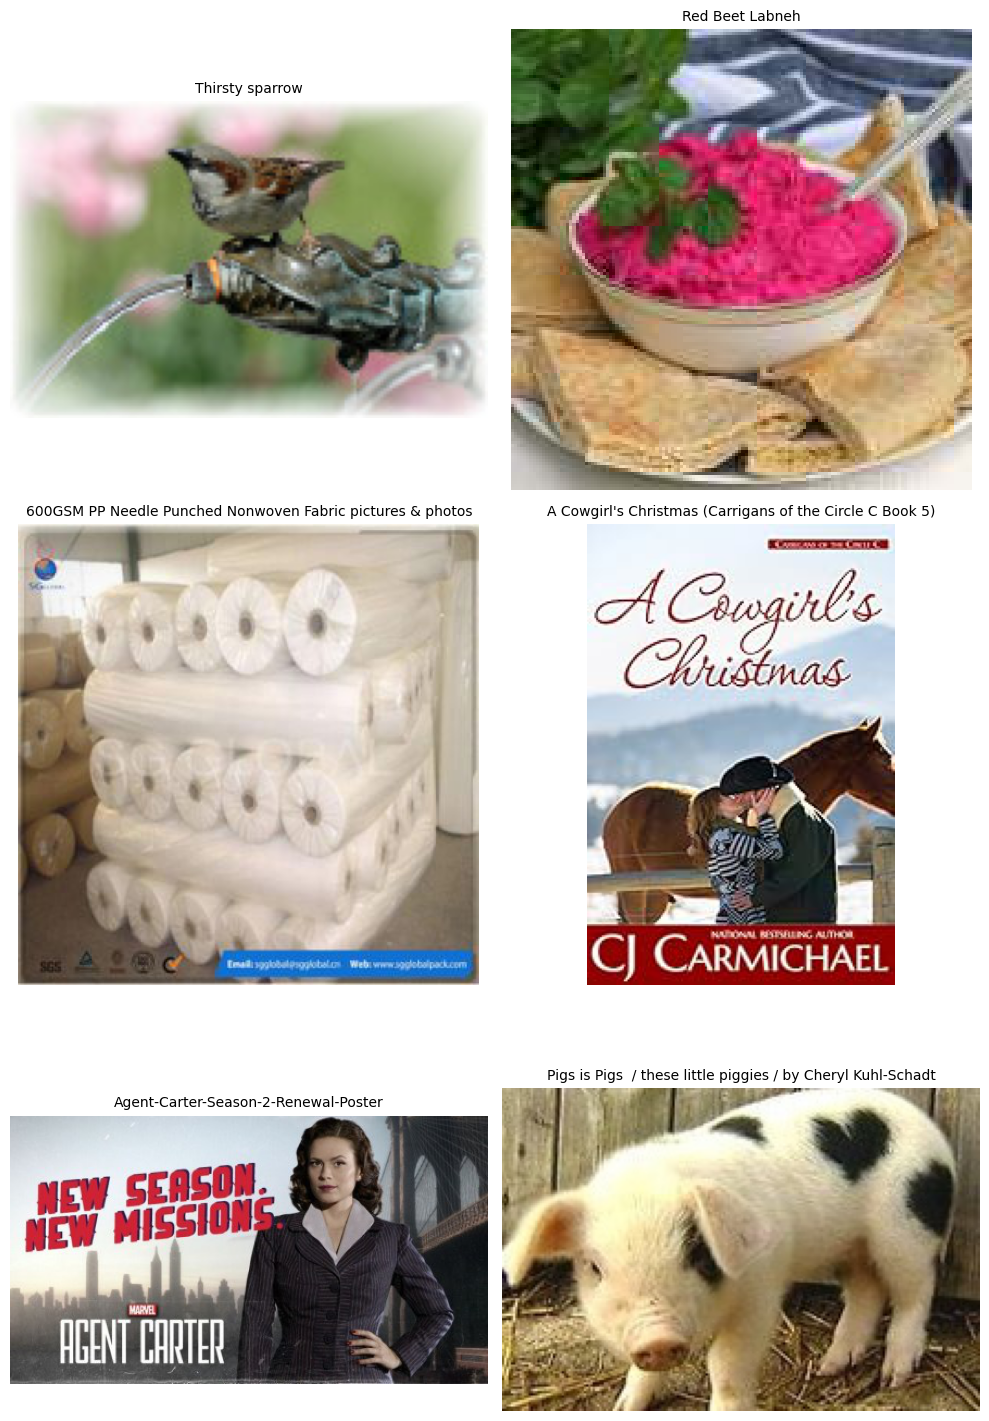

In [11]:
import random
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load a smaller portion of the dataset (e.g., the first 100 samples for efficiency)
num_samples_to_take = 100
dataset = load_dataset("laion/laion2B-en", split='train', streaming=True)  # Load dataset with streaming
dataset = dataset.take(num_samples_to_take)

# Number of images the user wants to display
num_samples = 6

# Function to display images in a grid format (2 images per row)
def display_images(image_text_pairs, num_samples):
    displayed_images = 0
    num_rows = (num_samples + 1) // 2  # Calculate the number of rows (2 images per row)
    
    # Create the figure and axes for subplots
    fig, axes = plt.subplots(num_rows, 2, figsize=(10, 5 * num_rows))
    axes = axes.flatten()  # Flatten the axes to make indexing easier

    while displayed_images < num_samples:
        # Sample a random image pair
        sample = random.choice(image_text_pairs)
        image_url = sample['url']
        caption = sample['caption']
        
        try:
            # Download the image
            response = requests.get(image_url)
            response.raise_for_status()  # Check if the request was successful (status code 200)
            img = Image.open(BytesIO(response.content))
        except Exception as e:
            print(f"Error downloading image: {e}")
            continue  # Skip this image if there's an error
        
        # Display the image on the corresponding subplot
        ax = axes[displayed_images]
        ax.imshow(img)
        ax.axis('off')  # Turn off the axes
        ax.set_title(caption, fontsize=10, wrap=True)  # Display the caption below the image
        
        displayed_images += 1  # Increment the counter for displayed images

    # Hide unused subplots if the number of images isn't a perfect multiple of 2
    for i in range(displayed_images, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Display images with captions
display_images(list(dataset), num_samples)


#### How is the Training Done for CLIP Model?

The **CLIP (Contrastive Language-Image Pretraining)** model leverages a combination of a vision model (like ViT or ResNet) and a text model (like a Transformer) to learn the relationship between images and text. Let's break down the training process, focusing on how image-text pairs are handled and the model architecture, along with the training steps.


#### **1. Architecture:**

The **CLIP model** consists of two separate neural networks, one for processing images and another for processing text. Here's how each part is structured:

#### Vision Encoder:
- CLIP uses a **Vision Transformer (ViT)** or **ResNet** model as the encoder for images.
- The image is passed through the encoder, which extracts feature representations from the input image. These feature representations are high-dimensional vectors that capture important visual content, such as objects, textures, and shapes.

#### Text Encoder:
- CLIP uses a **Transformer** architecture as the encoder for text.
- The input text (usually a caption or description of the image) is tokenized (split into smaller pieces such as words or subwords) and then processed by the Transformer. The output is a vector that represents the semantic content of the text.

Both encoders transform their respective inputs into a **joint embedding space** where both image and text representations are mapped into a shared space, allowing for cross-modal comparison.


#### **2. Objective:**

The training objective is based on **contrastive learning** with a **contrastive loss function**, which aims to bring matching image-text pairs closer in the shared embedding space while pushing non-matching pairs apart.

#### Contrastive Loss:
- For each training step, CLIP takes a batch of image-text pairs, computes their embeddings using the vision and text encoders, and then calculates a similarity score (typically cosine similarity) between the image and its corresponding text.
- The goal is to maximize the similarity between the correct image-text pair and minimize the similarity between incorrect pairs (i.e., a text-image pair that doesn’t match).
- The loss function is calculated using the **InfoNCE (Noise Contrastive Estimation)** criterion, which is essentially the softmax-based cross-entropy between the correct matching image-text pair and all other incorrect pairs in the batch.

$$L_i = -\log\left(\frac{\exp(\text{sim}(v_i, t_i) / \tau)}{\sum_{j=1}^{N} \exp(\text{sim}(v_i, t_j) / \tau)}\right)$$

Where:

*   `v_i`: Image embedding.
*   `t_i`: Text embedding.
*   `N`: Batch size.
*   `sim(v_i, t_j)`: Cosine similarity.
*   `\tau`: Temperature.

Batch loss:
$$L = \frac{1}{N} \sum_{i=1}^{N} L_i$$

#### **3. Steps Involved in Training:**

Training CLIP involves several steps to ensure that both the vision and text encoders learn meaningful representations for the joint embedding space. Here's how the training process typically flows:

#### **Step 1: Data Preparation:**
- **Image-Text Pairs:**
  - CLIP's training data consists of image-text pairs. For instance, in datasets like LAION-400M, each example consists of an image paired with a textual description or caption. The text provides the context or semantic meaning of the image, such as a description like "a dog running on the beach".
  - The text can vary in length, and the image can be anything from an object to a scene.
  
- **Sample Image-Text Pair:**
  - **Image**: A photo of a dog running on a beach.
  - **Text (caption)**: "A dog running on the beach with the waves crashing."

- **Preprocessing:**
  - **Image**: Images are typically resized to a fixed size (e.g., 224x224 pixels) and normalized to a specific range based on the training data's statistics.
  - **Text**: The textual data is tokenized (e.g., using Byte Pair Encoding (BPE) or similar tokenization methods) and then converted into embeddings via the Transformer model.

#### **Step 2: Feature Extraction:**
- **Image Embedding**: The image is passed through the vision model (ViT or ResNet) to extract its feature representation. This output is typically a high-dimensional vector that encodes visual information.
- **Text Embedding**: The text is passed through the text encoder (Transformer) to extract its feature representation. This output is also a high-dimensional vector but encodes the semantic content of the caption or description.

#### **Step 3: Loss Computation:**
- **Contrastive Learning Objective**:
  - For each image-text pair in the batch, CLIP calculates the cosine similarity between the image and the text embeddings.
  - The contrastive loss is computed for each pair:
    - **Positive Pair**: The cosine similarity between the image and its matching text should be maximized.
    - **Negative Pairs**: The cosine similarity between an image and all other texts in the batch should be minimized (i.e., non-matching pairs should be far apart in the embedding space).
  - The loss function is designed to train the model to match images with their corresponding captions in the embedding space while distinguishing them from other pairs in the batch.


#### **Step 4: Backpropagation and Optimization:**
- The loss is backpropagated through the vision and text encoders, adjusting the parameters of both the image and text models to minimize the contrastive loss.
- **Optimization**: The training is typically done using a variant of Stochastic Gradient Descent (SGD) or Adam to update the model parameters.

#### **Step 5: Repeat:**
- This process is repeated for several epochs, with the model gradually learning to align image and text representations in the joint embedding space.


#### **4. Training Image-Text Pairs:**

For training, datasets like **LAION-400M** (or other similar datasets) provide large-scale collections of image-text pairs. In the context of CLIP, these image-text pairs are curated and preprocessed as follows:

- **Image**:
  - The dataset contains millions of images collected from the internet.
  - Each image is processed and resized to a fixed dimension (usually 224x224 or 256x256 pixels).
  - Images may also undergo augmentation (e.g., random cropping, flipping, or color jitter) to improve generalization.

- **Text**:
  - Each image is paired with a textual description or caption.
  - The captions are often extracted from metadata or generated via web scraping (for instance, using alt-text from images or descriptions from web pages).
  - These texts provide rich, natural language descriptions of the images, which are tokenized for input into the text encoder.

- **Data Selection**:
  - The image-text pairs are typically sampled in large batches to provide diverse and varied examples during training. Random sampling ensures that the model sees a wide variety of image and text combinations.

In CLIP:

*   **Positive pairs:** Image and its corresponding caption from the dataset.
*   **Negative pairs:** Any other image-caption combination within the same batch (i.e., an image paired with a caption that doesn't belong to it).


#### How is Inference Done with CLIP?

Inference with the CLIP (Contrastive Language-Image Pretraining) model involves using the trained model to make predictions or perform tasks such as classification, retrieval, and other vision-language tasks. CLIP’s unique ability to map both images and text into a shared embedding space enables it to perform these tasks with little to no task-specific fine-tuning. Here’s how the inference process works:

#### 1. **Workflow**: Steps to Use CLIP for Classification, Retrieval, or Other Tasks

- **Input Data**: 
  - **For Image Classification**: You input an image that you want to classify.
  - **For Text Query-Based Retrieval**: You input a textual query or description.
  - **For Image-Text Retrieval**: You input both an image and a text description to find the most relevant match.

- **Step 1: Feature Extraction**:
  - **Image Embedding**: The image is passed through the **vision encoder** (such as ViT or ResNet) to extract a high-dimensional feature vector. This vector captures the visual content of the image.
  - **Text Embedding**: The text is passed through the **text encoder** (a Transformer-based model) to generate a high-dimensional feature vector representing the semantic content of the text.

- **Step 2: Computing Similarities**:
  - **Cosine Similarity**: Once the image and text embeddings are obtained, they are compared using a similarity measure, typically **cosine similarity**. Cosine similarity quantifies how similar the two vectors are in terms of their orientation (regardless of their magnitude).
  - **For Classification**: For image classification, you compare the image embedding to pre-defined class label descriptions (text descriptions for each class).
  - **For Retrieval**: For image retrieval, the cosine similarity between the image and all possible text queries or descriptions is computed to rank which text best matches the image. Similarly, for text retrieval, the similarity between the text query and a set of images is computed.

- **Step 3: Generating Predictions**:
  - **For Classification**: CLIP generates a prediction by selecting the text class description that has the highest similarity with the image embedding.
  - **For Retrieval**: The result is typically a ranked list of images or text descriptions based on their similarity to the query (image or text).
  
#### 2. **Flexibility**: Few-shot and Zero-shot Capabilities

One of the key strengths of CLIP is its ability to perform **few-shot** and **zero-shot** learning, meaning that it can make predictions on new tasks without requiring task-specific fine-tuning.

- **Zero-shot Learning**:
  - **Zero-shot** means CLIP can make predictions for tasks that it has not explicitly been trained on. Because CLIP was trained on a massive dataset of image-text pairs, it learns a generalized understanding of the relationship between images and text.
  - For example, when asked to classify an image of a dog, CLIP does not need to be trained specifically on dog classification. Instead, you can simply provide a set of text prompts like “a photo of a dog,” and CLIP will match the image to the most semantically similar text in its embedding space.
  - This zero-shot capability can be used for tasks like **image classification**, **text-to-image retrieval**, and **image-to-text retrieval** without any additional fine-tuning.

- **Few-shot Learning**:
  - **Few-shot** learning refers to CLIP’s ability to perform tasks with a small number of labeled examples.
  - For example, if you want to classify a new category (e.g., “a cat with a top hat”), you only need to provide a few textual descriptions of this category. CLIP can leverage its pre-trained knowledge and these few descriptions to classify images of cats with top hats.
  - The flexibility of CLIP’s architecture makes it highly adaptable to new tasks with minimal examples, especially in tasks such as **few-shot image classification** or **text-to-image retrieval**.

#### 3. **Output**: How Similarity Scores or Predictions are Generated

- **Similarity Scores**: 
  - CLIP outputs **cosine similarity scores** between image and text embeddings, quantifying how well they match. The higher the similarity score, the more likely the image and text represent the same concept.
  - For example, if an image is passed with the text prompt "a dog running in the park," the cosine similarity score between the image embedding and the text embedding will indicate how closely the image matches the text description.

- **For Image Classification**:
  - After calculating the similarity scores between the image embedding and the text descriptions for each class, the class with the highest similarity score is chosen as the predicted label. 
  - For instance, in a scenario where CLIP is asked to classify an image into categories like “dog,” “cat,” and “car,” it will compare the image’s embedding with the embeddings of text prompts like "a photo of a dog," "a photo of a cat," and "a photo of a car." The category with the highest score is selected.

- **For Image Retrieval**:
  - Given an image, CLIP will generate a set of similarity scores with a predefined collection of text descriptions. The image is then ranked based on these scores, and the most similar descriptions are returned.
  - In **text-to-image retrieval**, a text description is given, and CLIP retrieves the most relevant images based on their similarity to the text embedding.

- **For Text Retrieval**:
  - Given a text query, CLIP computes the similarity between the query’s embedding and a collection of image embeddings. The images with the highest cosine similarity scores are retrieved.


In [ ]:
## To implement few-shot learning using the CLIP model for image classification, you'll need to use CLIP's ability to match images to a small set of textual descriptions representing the new category.

# Importing required libraries
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load pre-trained CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

# Load an image (for example, an image of a cat with a top hat)
img_url = 'https://media.istockphoto.com/id/172183258/photo/cat-in-a-hat.jpg'  # Replace with an actual image URL
image = Image.open(requests.get(img_url, stream=True).raw)

# Few-shot text descriptions for the new category (e.g., "cat with top hat")
text_descriptions = [
    "a cat with a top hat",
    "a cat wearing a top hat",
    "a cute cat with a stylish top hat",
    "a cat in a fancy top hat"
]

# Preprocess the image and text
inputs = processor(text=text_descriptions, images=image, return_tensors="pt", padding=True)

# Perform inference
with torch.no_grad():
    # Get image and text embeddings
    image_embeddings = model.get_image_features(**inputs)
    text_embeddings = model.get_text_features(**inputs)

# Normalize the embeddings (important for cosine similarity)
image_embeddings /= image_embeddings.norm(p=2, dim=-1, keepdim=True)
text_embeddings /= text_embeddings.norm(p=2, dim=-1, keepdim=True)

# Compute cosine similarity between the image and text embeddings
similarities = cosine_similarity(image_embeddings.cpu().numpy(), text_embeddings.cpu().numpy())

# Get the most similar description for the image
most_similar_idx = np.argmax(similarities)
predicted_class = text_descriptions[most_similar_idx]

print(f"The image is most similar to the class: {predicted_class}")


Few articles to read:
- https://jina.ai/news/beyond-clip-how-jina-clip-advances-multimodal-search/
- https://github.com/jina-ai/clip-as-service
- https://jina.ai/news/the-what-and-why-of-text-image-modality-gap-in-clip-models/